The datset shall be cleaned through the following process:
1. Checking the number of columns
2. Changing misspelt column names to correct names'
3. Checking for missing values
4. Checking for duplicate values
5. Checking for outliers

In [24]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns

In [25]:
# Read data files
df = pd.read_csv('/content/diabetes_unclean.csv')

In [26]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [27]:
# checking for number of columns
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [28]:
# Rename the col 'No_Pation' to 'Patients_No'
df.rename(columns={'No_Pation':'Patients_No'}, inplace=True)

In [29]:
# To confirm the change
df.columns

Index(['ID', 'Patients_No', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
       'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [30]:
# To check for the missing values
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          3
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [31]:
# Replace the missing values in the col 'HbA1c'
mean_value = df['HbA1c'].mean()
mean_value

8.284155069582505

In [32]:
# Using the mean value to replace the missing records
df['HbA1c'].fillna(mean_value, inplace = True)

In [33]:
# To confirm the change
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          0
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [34]:
# Droping the missing value of other columns
df1 = df.dropna()
df1.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            0
Urea           0
Cr             0
HbA1c          0
Chol           0
TG             0
HDL            0
LDL            0
VLDL           0
BMI            0
CLASS          0
dtype: int64

In [35]:
# Check for information concerning the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           997 non-null    int64  
 1   Patients_No  997 non-null    int64  
 2   Gender       997 non-null    object 
 3   AGE          997 non-null    float64
 4   Urea         997 non-null    float64
 5   Cr           997 non-null    float64
 6   HbA1c        997 non-null    float64
 7   Chol         997 non-null    float64
 8   TG           997 non-null    float64
 9   HDL          997 non-null    float64
 10  LDL          997 non-null    float64
 11  VLDL         997 non-null    float64
 12  BMI          997 non-null    float64
 13  CLASS        997 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 116.8+ KB


In [36]:
df1.groupby('CLASS')['CLASS'].agg('count')

CLASS
N     102
N       1
P      53
Y     832
Y       9
Name: CLASS, dtype: int64

In [37]:
# Check for the unique values in the col 'CLASS'
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [46]:
# To clean the column, I'll replace with the unique value
replacement_map = {
    'N': 'N',
    'N ': 'N',
    'P': 'P',
    'Y': 'Y',
    'Y ': 'Y'
}
df1['CLASS'] = df1['CLASS'].replace(replacement_map)

<ipython-input-46-d953d256fefb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLASS'] = df1['CLASS'].replace(replacement_map)


In [47]:
# To confirm the change
df1['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

<Axes: ylabel='Cr'>

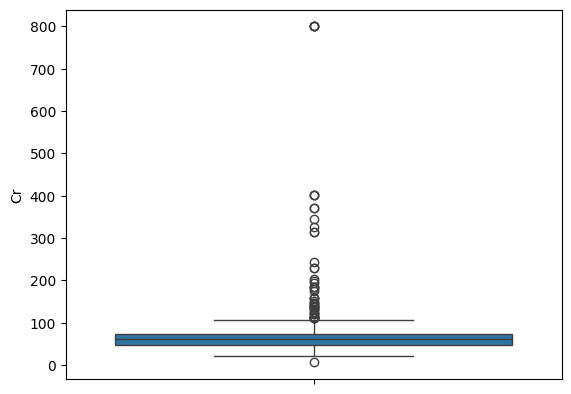

In [48]:
# Checking for outlier in the datasets
sns.boxplot(df1['Cr'])

In [49]:
# Choose the maximum quantile to fill in the outliers
max_cr = df1['Cr'].quantile(0.995)
max_cr

401.0

In [50]:
df1[df1['Cr'] > max_cr]

,ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,266,24060,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,1,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,19,51623,M,60.0,20.8,800.0,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [51]:
# Assigning the new data to a new dataframe
df2 = df1[df1['Cr'] < max_cr]

<Axes: ylabel='Cr'>

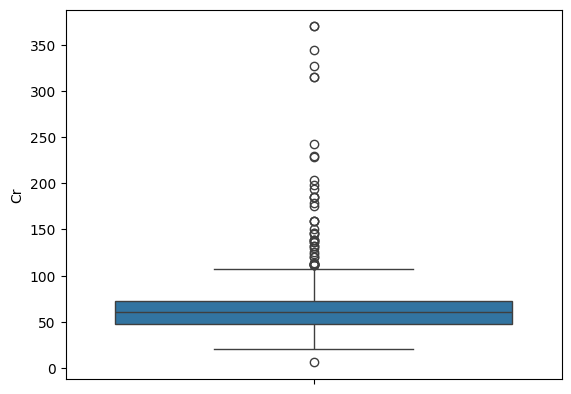

In [52]:
# To confirm the change
sns.boxplot(df2['Cr'])

<Axes: ylabel='HbA1c'>

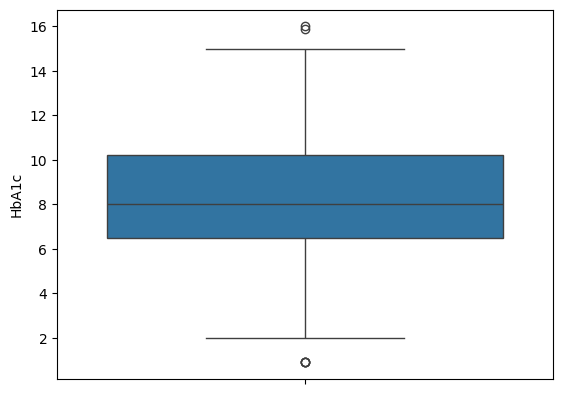

In [53]:
# Checking for outliers in '' col
sns.boxplot(df2['HbA1c'])

In [55]:
# Checking for duplicate values
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1002     True
1003     True
1005    False
1007    False
1008     True
Length: 990, dtype: bool

In [56]:
df3 = df2.drop_duplicates()

In [58]:
# To confirm the change
df3.duplicated().sum()

0

In [59]:
# save in csv file

In [60]:
df3.to_csv('Cleaned_data.csv')